In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import warnings; warnings.simplefilter('ignore')
# !pip install graphviz
# !pip install dtreeviz
import graphviz, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import model_selection, tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
# from dtreeviz.trees import *
from IPython.core.display import display, HTML


sns.set(style="ticks", color_codes=True)

In [ ]:
exclude_date = ['last_purchased_mf','first_purchase_il','last_purchase_il']

In [ ]:
# Load DataFile CSV
df = pd.read_csv('C:/Users/fatia.nastitie/insurlater_dataset.csv') # run locally
# exclude date, should convert to date_diff first if applicable
df = df.drop(exclude_date, axis=1)
df.head()

In [ ]:
df.dtypes

user_id                 int64
sex                     int64
age                   float64
account_age             int64
spender_type           object
promo_user             object
dg_profile             object
location               object
total_PG_amount       float64
total_PG_trans        float64
ABS_PG                float64
total_DG_trans        float64
total_DG_amount       float64
ABS_DG                float64
tier                   object
total_insurlater      float64
egold_amt             float64
num_trx_egold         float64
total_order_mf        float64
last_egold_trx         object
DG_ins_order          float64
PG_ins_order          float64
total_order_fi        float64
PG_catname             object
DG_catname             object
gateway_name           object
cicilan_loan           object
payment_method_il      object
avg_duration          float64
most_courier           object
count_ticket          float64
search_session        float64
mbkf                  float64
fashion   

In [ ]:
df['age'].fillna((df['age'].median()), inplace=True)

In [ ]:
df.drop(df[df['age'] > 100].index, inplace = True)

In [ ]:
df['last_egold_trx'] = pd.to_datetime(df['last_egold_trx'], utc='TRUE')
df['last_egold_trx'] = df['last_egold_trx'].dt.day_name()

In [ ]:
df['cicilan_loan'].fillna('No', inplace =True)

In [ ]:
df.dtypes

user_id                 int64
sex                     int64
age                   float64
account_age             int64
spender_type           object
promo_user             object
dg_profile             object
location               object
total_PG_amount       float64
total_PG_trans        float64
ABS_PG                float64
total_DG_trans        float64
total_DG_amount       float64
ABS_DG                float64
tier                   object
total_insurlater      float64
egold_amt             float64
num_trx_egold         float64
total_order_mf        float64
last_egold_trx         object
DG_ins_order          float64
PG_ins_order          float64
total_order_fi        float64
PG_catname             object
DG_catname             object
gateway_name           object
cicilan_loan           object
payment_method_il      object
avg_duration          float64
most_courier           object
count_ticket          float64
search_session        float64
mbkf                  float64
fashion   

In [ ]:
df.describe()

,user_id,sex,age,account_age,total_PG_amount,total_PG_trans,ABS_PG,total_DG_trans,total_DG_amount,ABS_DG,total_insurlater,egold_amt,num_trx_egold,total_order_mf,DG_ins_order,PG_ins_order,total_order_fi,avg_duration,count_ticket,search_session,mbkf,fashion,automotive,fnb,electronics,handphone,beauty,home_living,sport_hobbies,health,other_pg,Utilities,Financial_Services,telco,tops_ups,travel,entertainment,other_dg
count,2.013600e+04,20136.000000,20136.000000,20136.000000,2.013600e+04,20136.000000,2.013600e+04,20136.000000,2.013600e+04,2.013600e+04,20136.00000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.00000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000,20136.000000
mean,4.465333e+07,1.010528,32.054827,2.436581,2.129659e+07,24.128427,6.901699e+05,7.652364,2.246674e+06,1.328217e+05,0.10007,0.033181,1.412098,0.119190,0.128427,0.682112,0.006108,2.408019,0.00437,0.025526,0.864472,2.106426,1.427940,2.460816,3.431814,1.989621,0.716428,4.856178,1.865515,3.400228,2.594160,2.865117,0.460171,3.417859,0.628675,0.055920,0.138558,0.086065
std,3.770269e+07,0.702819,8.781557,2.011107,1.257301e+08,100.856101,1.916850e+06,18.400606,1.046974e+07,8.267245e+05,0.33749,0.994676,28.466926,1.612559,0.680710,2.111096,0.139930,1.723211,0.08085,0.214785,3.792869,25.136885,12.364366,10.351294,10.623129,10.862600,3.386492,34.117204,12.695020,11.324979,11.317618,8.742242,2.413850,9.664602,3.844666,0.491448,4.456179,0.529528
min,7.100000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.044606e+07,1.000000,27.000000,1.000000,4.107600e+05,2.000000,1.215000e+05,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.123081e+07,1.000000,31.000000,2.000000,2.041058e+06,7.000000,2.435185e+05,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.166347e+07,1.000000,35.000000,4.000000,1.016587e+07,23.000000,5.560015e+05,6.000000,7.817000e+05,1.169135e+05,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.00000,0.000000,0.000000,2.000000,1.000000,1.000000,3.000000,2.000000,0.000000,4.000000,1.000000,3.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,1.206779e+08,3.000000,93.000000,11.000000,8.491939e+09,11899.000000,7.189550e+07,474.000000,8.081692e+08,6.682000e+07,11.00000,114.717000,3516.000000,82.000000,19.000000,63.000000,13.000000,45.000000,5.00000,11.000000,135.000000,3405.000000,1499.000000,318.000000,481.000000,917.000000,188.000000,4362.000000,1399.000000,625.000000,780.000000,170.000000,73.000000,239.000000,122.000000,20.000000,451.000000,20.000000


In [ ]:
# df.fillna(0, inplace = True)

## Numeric

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)
df_numeric.fillna(0, inplace = True)
df_numeric__cols = list(df_numeric.columns)

df[df_numeric__cols] = df_numeric

## Non-Numeric

In [ ]:
df_non_numeric = df.select_dtypes(exclude=numerics)

In [ ]:
df.isnull().sum()

user_id                   0
sex                       0
age                       0
account_age               0
spender_type             47
promo_user               47
dg_profile             9620
location                  8
total_PG_amount           0
total_PG_trans            0
ABS_PG                    0
total_DG_trans            0
total_DG_amount           0
ABS_DG                    0
tier                    154
total_insurlater          0
egold_amt                 0
num_trx_egold             0
total_order_mf            0
last_egold_trx        17049
DG_ins_order              0
PG_ins_order              0
total_order_fi            0
PG_catname             2299
DG_catname            10752
gateway_name             64
cicilan_loan              0
payment_method_il     18272
avg_duration              0
most_courier            403
count_ticket              0
search_session            0
mbkf                      0
fashion                   0
automotive                0
fnb                 

In [ ]:
df_non_numeric.fillna('Null', inplace=True)
df_non_numeric__cols = df_non_numeric.columns
df[df_non_numeric__cols] = df_non_numeric

## WoE

In [ ]:
import scorecardpy as sc
df.Insurlater = df.Insurlater.apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
bins = sc.woebin(df, y = 'Insurlater',
                 min_perc_fine_bin=0.02,
                 min_perc_coarse_bin=0.05,
                 stop_limit=0.1,
                 max_num_bin=8,
                 method='tree')

[INFO] creating woe binning ...
>>> There are 2 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
location, PG_catname
>>> Continue the binning process?
1: yes 
2: no
Selection: 1
Binning on 20136 rows and 51 columns in 00:01:55


In [ ]:
df_woe = sc.woebin_ply(df, sc.woebin(df, y="Insurlater"))

[INFO] creating woe binning ...
>>> There are 2 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
location, PG_catname
>>> Continue the binning process?
1: yes 
2: no
Selection: 1
Binning on 20136 rows and 51 columns in 00:02:00
[INFO] converting into woe values ...


In [ ]:
iv_dict = {info:bins[info].total_iv[0] for info in bins}
#iv_sumprint=
pd.Series(iv_dict).sort_values(ascending = False)
#iv_sumprint.to_csv('print_iv_below',index=True,header=True)

total_PG_amount       2.285088
electronics           1.884314
total_PG_trans        1.658373
handphone             1.537374
PG_catname            1.309128
tier                  1.301987
ABS_PG                1.257896
home_living           0.948124
total_DG_amount       0.945003
health                0.924620
dg_profile            0.894442
total_DG_trans        0.874756
ABS_DG                0.826850
user_id               0.796471
account_age           0.770710
PG_ins_order          0.767157
other_pg              0.764667
DG_catname            0.720048
sport_hobbies         0.703042
sex                   0.681020
automotive            0.650826
Utilities             0.596861
cicilan_loan          0.579399
telco                 0.565186
fnb                   0.557792
age                   0.517476
gateway_name          0.489557
location              0.429865
Financial_Services    0.363859
tops_ups              0.360661
fashion               0.314789
last_egold_trx        0.278642
num_trx_

In [ ]:
df_woe.dtypes

Insurlater                  int64
location_woe              float64
sex_woe                   float64
total_insurlater_woe      float64
DG_catname_woe            float64
user_id_woe               float64
travel_woe                float64
total_PG_amount_woe       float64
other_pg_woe              float64
electronics_woe           float64
PG_ins_order_woe          float64
egold_amt_woe             float64
health_woe                float64
account_age_woe           float64
DG_ins_order_woe          float64
dg_profile_woe            float64
tops_ups_woe              float64
fashion_woe               float64
num_trx_egold_woe         float64
beauty_woe                float64
entertainment_woe         float64
mbkf_woe                  float64
total_DG_amount_woe       float64
total_order_mf_woe        float64
payment_method_il_woe     float64
Utilities_woe             float64
total_PG_trans_woe        float64
total_DG_trans_woe        float64
fnb_woe                   float64
automotive_woe

---

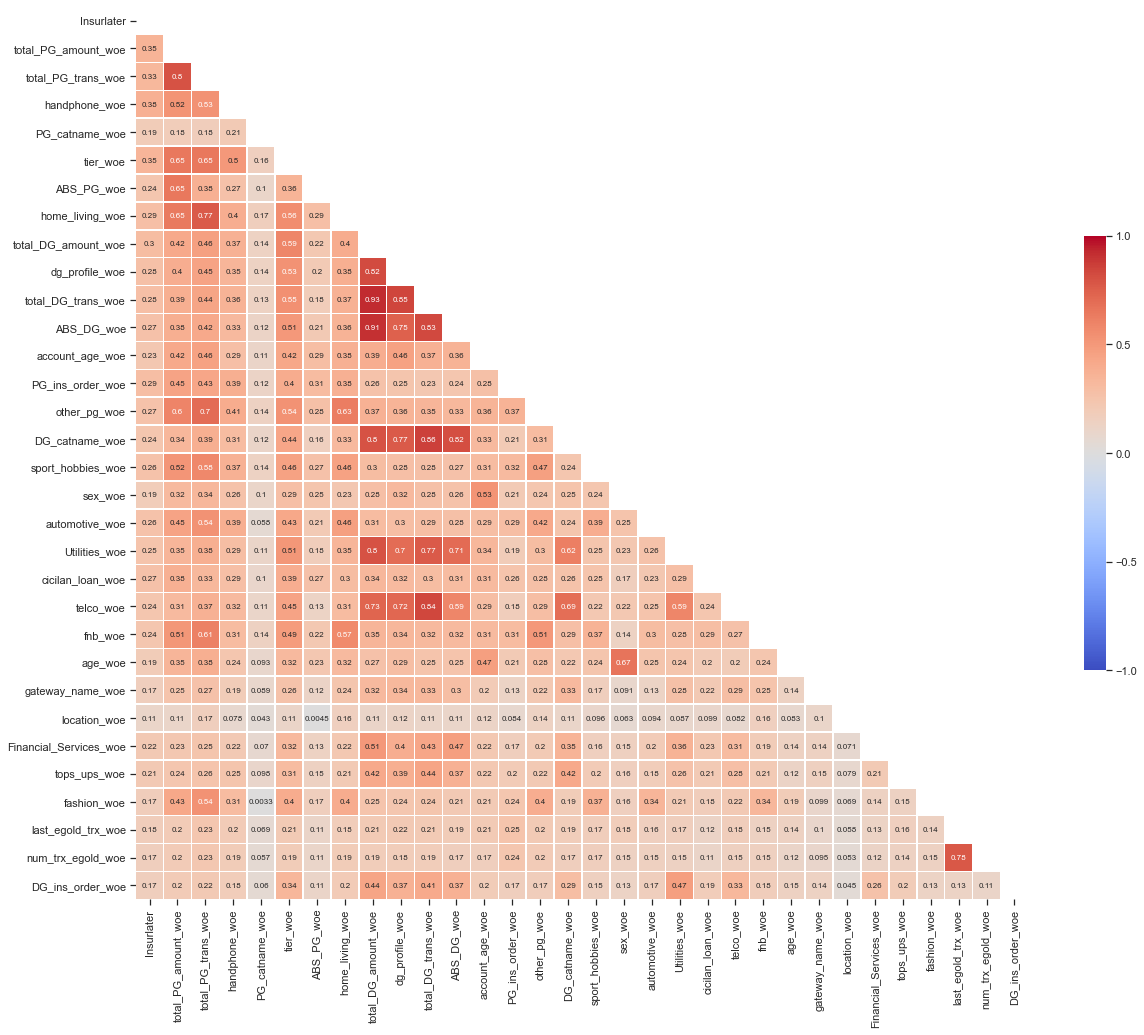

In [ ]:
df_below_corr = df_woe[['Insurlater','total_PG_amount_woe','total_PG_trans_woe','handphone_woe','PG_catname_woe','tier_woe',
                        'ABS_PG_woe','home_living_woe','total_DG_amount_woe','dg_profile_woe','total_DG_trans_woe','ABS_DG_woe' ,
                        'account_age_woe','PG_ins_order_woe','other_pg_woe','DG_catname_woe','sport_hobbies_woe','sex_woe','automotive_woe',
                        'Utilities_woe','cicilan_loan_woe','telco_woe' ,'fnb_woe','age_woe','gateway_name_woe','location_woe',
                       'Financial_Services_woe','tops_ups_woe' ,'fashion_woe','last_egold_trx_woe','num_trx_egold_woe','DG_ins_order_woe']]


corr_matrix = df_below_corr.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(20, 20))
heatmap = sns.heatmap(corr_matrix,
square = True,
mask = mask,
linewidths = .5,
cmap = 'coolwarm',
cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
vmin = -1,
vmax = 1,
annot = True,
annot_kws = {'size': 8})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.formula.api as sm

In [ ]:
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
#Calculating VIF values using that function
df_below_corr2=df_below_corr[['Insurlater','handphone_woe','tier_woe',
                        'ABS_PG_woe','home_living_woe',
                        'account_age_woe','PG_ins_order_woe','sport_hobbies_woe','sex_woe','automotive_woe',
                        'cicilan_loan_woe','telco_woe' ,'fnb_woe','age_woe','gateway_name_woe',
                       'Financial_Services_woe','tops_ups_woe' ,'num_trx_egold_woe','DG_ins_order_woe']]
vif_cal(input_data=df_below_corr2, dependent_col="Insurlater")

handphone_woe  VIF =  1.54
tier_woe  VIF =  2.28
ABS_PG_woe  VIF =  1.26
home_living_woe  VIF =  2.05
account_age_woe  VIF =  1.7
PG_ins_order_woe  VIF =  1.39
sport_hobbies_woe  VIF =  1.48
sex_woe  VIF =  2.14
automotive_woe  VIF =  1.45
cicilan_loan_woe  VIF =  1.29
telco_woe  VIF =  1.46
fnb_woe  VIF =  1.65
age_woe  VIF =  1.97
gateway_name_woe  VIF =  1.17
Financial_Services_woe  VIF =  1.21
tops_ups_woe  VIF =  1.18
num_trx_egold_woe  VIF =  1.1
DG_ins_order_woe  VIF =  1.22


In [ ]:
#trial using RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression



In [ ]:
X=df_below_corr2.drop("Insurlater",1)
Y = df_below_corr2["Insurlater"]
cols = list(X.columns)
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
print(selected_features_rfe)

selected_features_rfe

Num Features: 3
Selected Features: [ True False  True False False False False False False False False False
 False  True False False False False]
Feature Ranking: [ 1 16  1  5 11  8 12  2 13 10  7 14  6  1  3  9  4 15]
Index(['handphone_woe', 'ABS_PG_woe', 'gateway_name_woe'], dtype='object')


Index(['handphone_woe', 'ABS_PG_woe', 'gateway_name_woe'], dtype='object')

In [ ]:
#trial using RFECV

from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
X=df_below_corr2.drop("Insurlater",1)
Y = df_below_corr2["Insurlater"]
model = LogisticRegression()
selector = RFECV(model, step=1, cv=100)
selector = selector.fit(X, Y)
selector.support_
selector.ranking_

array([1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 4])

In [ ]:
cor_target = abs(corr_matrix["Insurlater"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

Insurlater             1.000000
total_PG_amount_woe    0.353236
total_PG_trans_woe     0.329834
handphone_woe          0.382438
tier_woe               0.350829
home_living_woe        0.286362
total_DG_amount_woe    0.298756
dg_profile_woe         0.276247
total_DG_trans_woe     0.281981
ABS_DG_woe             0.267885
PG_ins_order_woe       0.294461
other_pg_woe           0.265457
sport_hobbies_woe      0.258019
automotive_woe         0.260791
Utilities_woe          0.250283
cicilan_loan_woe       0.266028
Name: Insurlater, dtype: float64

In [ ]:
#trial backward elimination - skipped
X=df_below_corr.drop("Insurlater",1)
y = df_below_corr["Insurlater"]
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = add_constant(X_1)
    model = sm.ols('y~X_1',data=df_below_corr).fit()
    p = pd.Series(model.pvalues.values[2:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['total_PG_amount_woe', 'total_PG_trans_woe', 'handphone_woe', 'PG_catname_woe', 'tier_woe', 'ABS_PG_woe', 'home_living_woe', 'total_DG_trans_woe', 'PG_ins_order_woe', 'sport_hobbies_woe', 'automotive_woe', 'Utilities_woe', 'cicilan_loan_woe', 'telco_woe', 'age_woe', 'gateway_name_woe', 'location_woe', 'Financial_Services_woe', 'tops_ups_woe', 'last_egold_trx_woe', 'num_trx_egold_woe']


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
#implementing the model

import statsmodels.api as sm
X=df_below_corr2.drop("Insurlater",1)
Y = df_below_corr2["Insurlater"]


logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.418385
         Iterations 7
                           Results: Logit
Model:               Logit             Pseudo R-squared:  -0.356    
Dependent Variable:  Insurlater        AIC:               16885.2177
Date:                2020-10-06 11:59  BIC:               17027.6024
No. Observations:    20136             Log-Likelihood:    -8424.6   
Df Model:            17                LL-Null:           -6210.8   
Df Residuals:        20118             LLR p-value:       1.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      7.0000                                         
--------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------
handphone_woe          0.5274   0.0178 29.6715 0.0000  0.4926 0.5622
tier_woe               0.062

In [ ]:
X1=df_below_corr2.drop(["Insurlater", "account_age_woe", "fnb_woe", "DG_ins_order_woe"],1)
Y = df_below_corr2["Insurlater"]

In [ ]:
#implementing the model after eliminate

logit_model=sm.Logit(Y,X1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.418490
         Iterations 7
                          Results: Logit
Model:                Logit            Pseudo R-squared: -0.357    
Dependent Variable:   Insurlater       AIC:              16883.4096
Date:                 2020-10-06 13:10 BIC:              17002.0635
No. Observations:     20136            Log-Likelihood:   -8426.7   
Df Model:             14               LL-Null:          -6210.8   
Df Residuals:         20121            LLR p-value:      1.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
-------------------------------------------------------------------
handphone_woe          0.5260   0.0178 29.6246 0.0000 0.4912 0.5608
tier_woe               0.0715   0.0225  3

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression(class_weight='balanced')
#fit the model on train dataset
logreg.fit(X_train, Y_train)

W = logreg.coef_
b = logreg.intercept_

print(W)
print(b)



[[0.48654195 0.04558942 0.6560553  0.19130025 0.19440879 0.16044946
  0.38889779 0.09906852 0.13154789 0.18987073 0.2950147  0.47328641
  0.23388484 0.10189718 0.32715619]]
[-0.04090724]


In [ ]:
#Predicting the test set results and calculating the accuracy


Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.8065


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[4398 1074]
 [  95  474]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      5472
           1       0.31      0.83      0.45       569

    accuracy                           0.81      6041
   macro avg       0.64      0.82      0.67      6041
weighted avg       0.92      0.81      0.84      6041



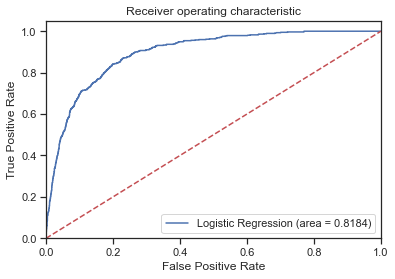

In [ ]:
#ROC AUC TEST DATA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

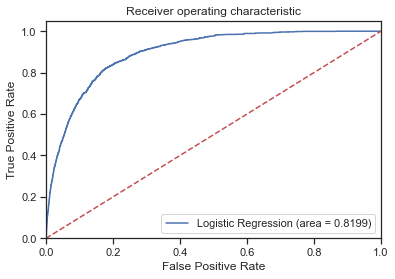

In [ ]:
#ROC AUC TRAIN DATA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_train, logreg.predict(X_train))
fpr, tpr, thresholds = roc_curve(Y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
#fit the model on train dataset
logreg.fit(X_train, Y_train)

W = logreg.coef_
b = logreg.intercept_

print(W)
print(b)


[[0.47291594 0.05192895 0.58857154 0.1355659  0.19370865 0.11271051
  0.43047393 0.06886854 0.13826021 0.19040658 0.36316021 0.46780397
  0.2594882  0.15629725 0.26150949]]
[-2.32826534]


In [ ]:
#Predicting the test set results and calculating the accuracy


Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.9141


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[5364  108]
 [ 411  158]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5472
           1       0.59      0.28      0.38       569

    accuracy                           0.91      6041
   macro avg       0.76      0.63      0.67      6041
weighted avg       0.90      0.91      0.90      6041

